In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.optimize import curve_fit
import random

%matplotlib notebook

In [10]:
rate1 = 5e3
rate2 = 5e3
rate3 = 2e3

In [11]:
sampling_rate=100e3

times1 = []
times2 = []
times3 = []

p1 = rate1 / sampling_rate
p2 = rate2 / sampling_rate / 2
p3 = p2 + rate3 / sampling_rate / 2


state1 = 0
length = 0

duration = 60 *  10 * sampling_rate

for i in range(int(duration)):    
    length += 1
    
    nr = random.random() 
    
    # Dot empty
    if state1 == 0:
        
        if nr < p1:
            times1.append(length)
            length = 0
            state1 = 1
    
    # Dot full
    elif state1 == 1:
        # Tunneling out of 2
        nr = random.random() 
        
        if nr < p2:
            times2.append(length)
            length = 0
            state1 = 0
        # Tunneling out of 3
        elif p2 < nr < p3:
            times3.append(length)
            length = 0
            state1 = 0
        # Tunneling out

<IPython.core.display.Javascript object>


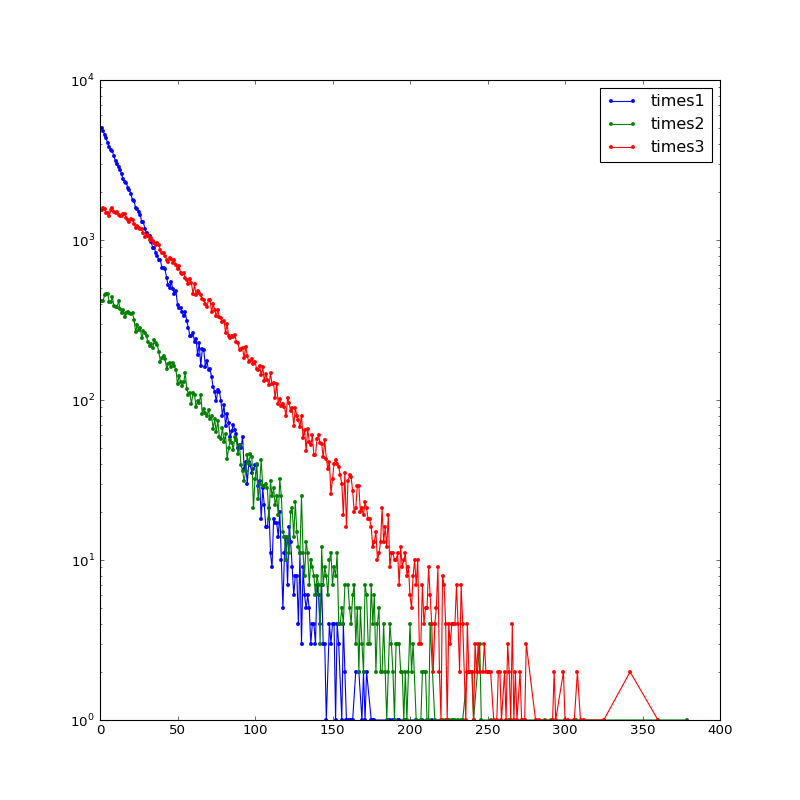

In [132]:
histo1 = Counter(times1)
bins1 = np.array(list(histo1.keys()))
freqs1 = np.array(list(histo1.values()))
freqs1.sum()

histo2 = Counter(times2)
bins2 = np.array(list(histo2.keys()))
freqs2 = np.array(list(histo2.values()))

histo3 = Counter(times3)
bins3 = np.array(list(histo3.keys()))
freqs3 = np.array(list(histo3.values()))


plt.figure(figsize=(10, 10))

plt.plot(bins1, freqs1, ls='-',  marker='.', label='times1')
plt.plot(bins2, freqs2, ls='-',  marker='.', label='times2')
plt.plot(bins3, freqs3, ls='-',  marker='.', label='times3')

plt.legend()
plt.yscale('log')

<IPython.core.display.Javascript object>


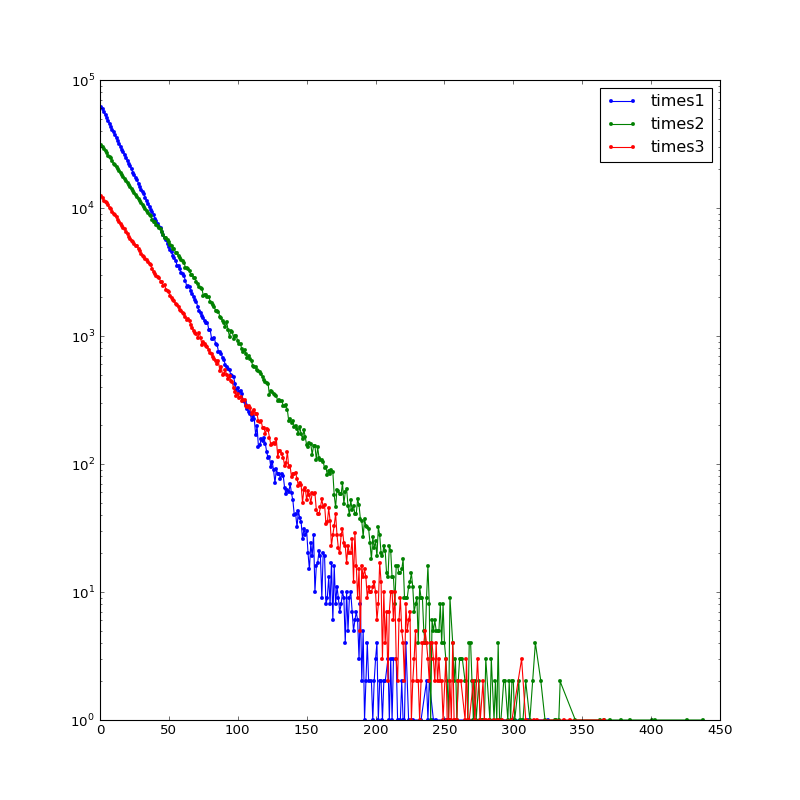

In [12]:
histo1 = Counter(times1)
bins1 = np.array(list(histo1.keys()))
freqs1 = np.array(list(histo1.values()))
freqs1.sum()

histo2 = Counter(times2)
bins2 = np.array(list(histo2.keys()))
freqs2 = np.array(list(histo2.values()))

histo3 = Counter(times3)
bins3 = np.array(list(histo3.keys()))
freqs3 = np.array(list(histo3.values()))


plt.figure(figsize=(10, 10))

plt.plot(bins1, freqs1, ls='-',  marker='.', label='times1')
plt.plot(bins2, freqs2, ls='-',  marker='.', label='times2')
plt.plot(bins3, freqs3, ls='-',  marker='.', label='times3')

plt.legend()
plt.yscale('log')

In [268]:
sampling_rate=100e3

times1 = []
times2 = []
times3 = []

p1 = rate1 / sampling_rate
p2 = rate2 / sampling_rate / 2
p3 = p2 + rate3 / sampling_rate / 2


state = 0
length = 0

duration = 60 * 10 * sampling_rate

for i in range(int(duration)):    
    length += 1
    
    nr = random.random() 
    
    # Dot empty
    if state == 0:
        # Tunneling out of 2
        nr = random.random() 
        
        if nr < p2:
            times2.append(length)
            length = 0
            state = 1
        # Tunneling out of 3
        elif p2 < nr < p3:
            state = 0
            times3.append(length)
            length = 0
            state = 1
    
    # Dot full
    elif state == 1:
        if nr < p1:
            times1.append(length)
            length = 0
            state = 0
    


<IPython.core.display.Javascript object>


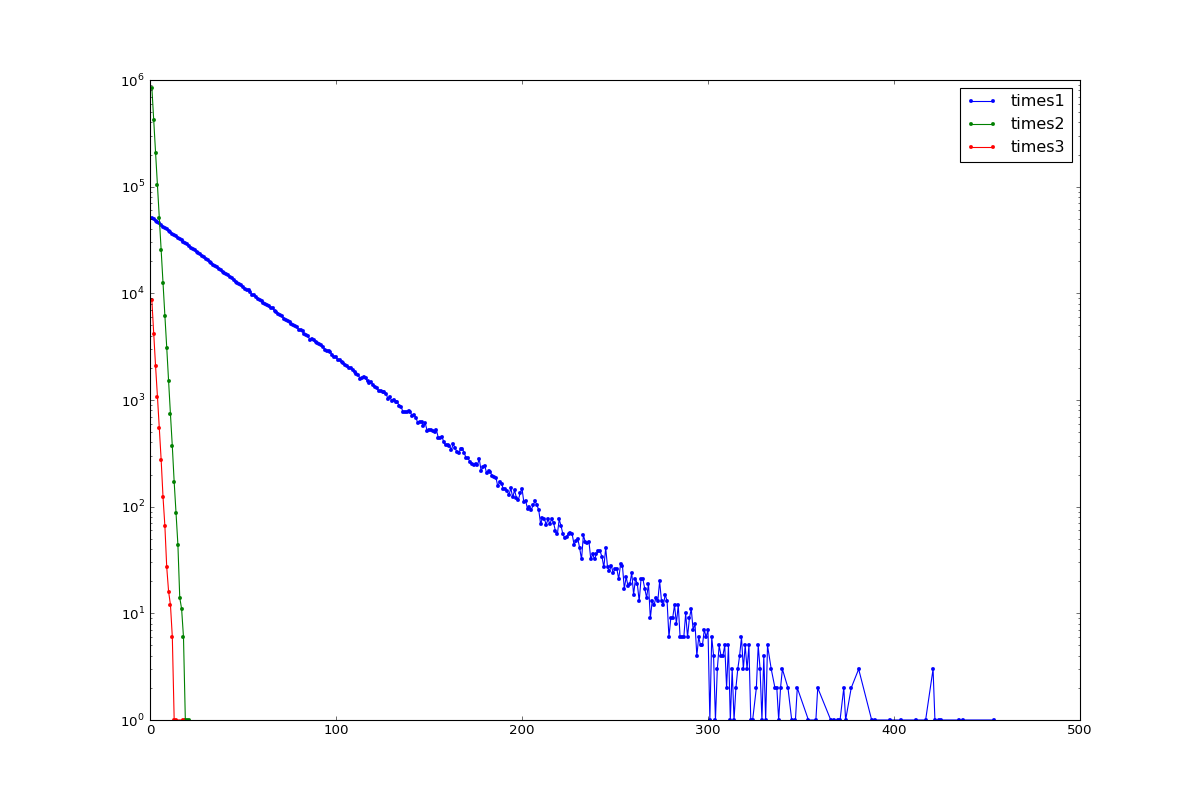

In [269]:
histo1 = Counter(times1)
bins1 = np.array(list(histo1.keys()))
freqs1 = np.array(list(histo1.values()))
freqs1.sum()

histo2 = Counter(times2)
bins2 = np.array(list(histo2.keys()))
freqs2 = np.array(list(histo2.values()))

histo3 = Counter(times3)
bins3 = np.array(list(histo3.keys()))
freqs3 = np.array(list(histo3.values()))


plt.figure(figsize=(15, 10))

plt.plot(bins1, freqs1, ls='-',  marker='.', label='times1')
plt.plot(bins2, freqs2, ls='-',  marker='.', label='times2')
plt.plot(bins3, freqs3, ls='-',  marker='.', label='times3')

plt.legend()
plt.yscale('log')

<IPython.core.display.Javascript object>


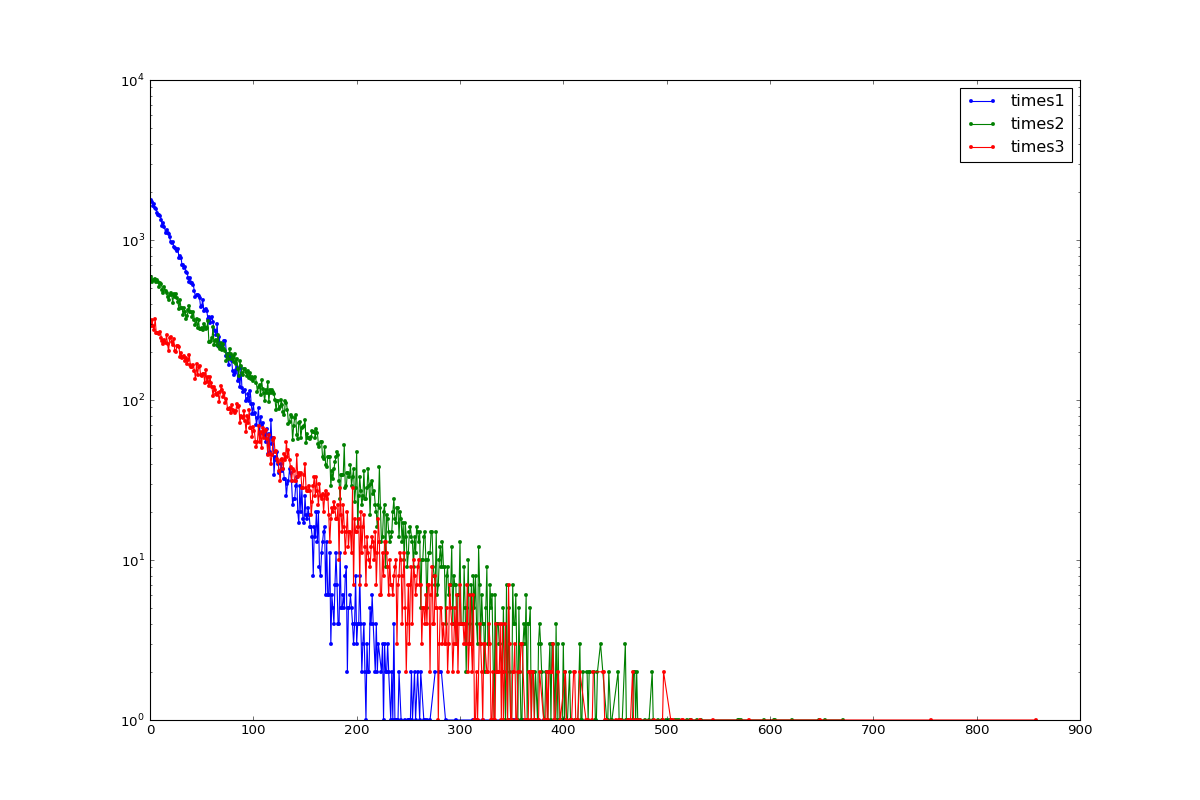

In [252]:
plt.figure(figsize=(15, 10))

plt.plot(bins1, freqs1, ls='-',  marker='.', label='times1')
plt.plot(bins2, freqs2, ls='-',  marker='.', label='times2')
plt.plot(bins3, freqs3, ls='-',  marker='.', label='times3')

plt.legend()
plt.yscale('log')

<IPython.core.display.Javascript object>


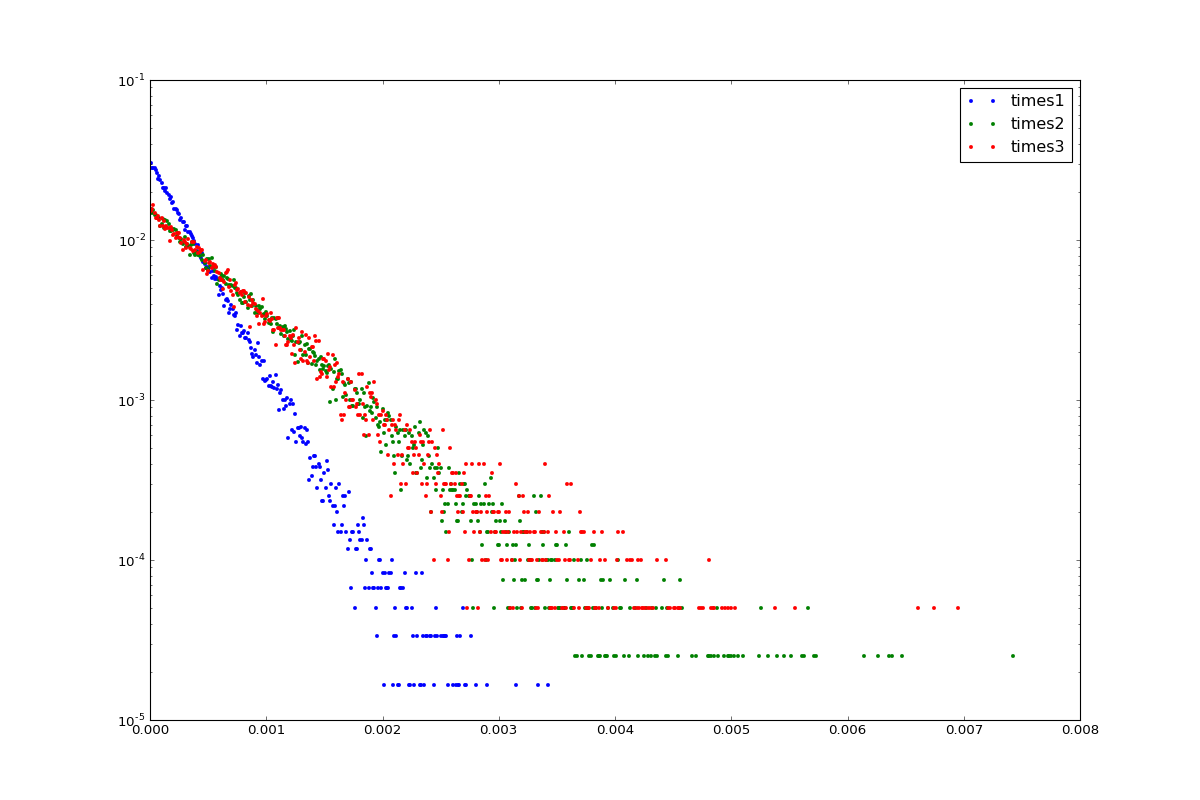

In [248]:
plt.figure(figsize=(15, 10))

plt.plot(bins1 / sampling_rate, freqs1 / freqs1.sum(), ls='',  marker='.', label='times1')
plt.plot(bins2 / sampling_rate, freqs2 / freqs2.sum(), ls='',  marker='.', label='times2')
plt.plot(bins3 / sampling_rate, freqs3 / freqs3.sum(), ls='',  marker='.', label='times3')

plt.legend()
plt.yscale('log')

In [270]:
 sampling_rate / np.mean(times1)

2999.6979941685186

In [271]:
 sampling_rate / np.mean(times2)

50484.871807494514

In [272]:
 sampling_rate / np.mean(times3)

50169.501518144032

In [274]:
np.mean(freqs2[:10] / freqs3[:10])

98.578763066432089

In [ ]:
def fexp(x, a=1, tau=-1):
    """Exponential function.
    """
    x = np.array(x, copy=False)
    return a * np.exp(x / tau)


def fit_exp(self, a=None, rate=None, range=None, normed=False):
        """Fit the time Histogram with an exponential function.
        """

        if rate is None:
            rate = -1 * self.mean

        if normed:
            if a is None:
                a = self.max_freq_n
            freqs = self.freqs_n
        else:
            if a is None:
                a = self.max_freq
            freqs = self.freqs

        bins = self.bins

        if range:
            index = (range[0] <= bins) & (bins <= range[1])
            bins = bins[index]
            freqs = freqs[index]

            
            
        #fit = Fit.exp(bins, freqs, a, rate)
        fit.rate = np.abs(fit.parameters[-1])
        return fit

    def rate(self, sample_rate=500e3, range=None):
        """Rate extracted by the fit_exp method.
        """
        return sample_rate / np.abs(self.fit_exp(range=range).parameters[-1])

In [69]:
rate01 = 5e3
rate12 = 25e3
rate13 = 25e3
rate20 = 100
#rate30 = 100e3

In [70]:
rates30  = [0, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

In [71]:
ts1 = []
ts2 = []
ts3 = []


for rate30 in rates30:
    sampling_rate=100e3

    length01 = 0
    times01 = []

    length123 = 0
    times12 = []
    times13 = []

    length20 = 0
    times20 = []

    length30 = 0
    times30 = []


    p01 = rate01 / sampling_rate
    p12 = rate12 / sampling_rate / 2
    p13 = p12 + rate13 / sampling_rate / 2
    p20 = rate20 / sampling_rate
    p30 = rate30 / sampling_rate


    state1 = 0
    state2 = 0
    state3 = 0


    duration = 60 * sampling_rate

    t1 = 0
    t2 = 0
    t3 = 0

    for i in range(int(duration)):    


        nr = random.random() 

        if state2 == 1:
            length20 += 1
            if random.random() < p20:
                times20.append(length20)
                length20 = 0
                state2 = 0
                t2 += 1

        if state3 == 1:
            length30 += 1
            if random.random() < p30:
                times30.append(length30)
                length30 = 0
                state3 = 0
                t3 += 1

        # Dot empty
        if state1 == 0:
            length01 += 1
            if random.random() < p01:
                times01.append(length01)
                length01 = 0
                state1 = 1 
                t1 += 1

        # Dot full
        elif state1 == 1:
            length123 += 1
            # Tunneling out of 2
            nr = random.random() 
            if ((nr < p12) and (state2 == 0)):
                times12.append(length123)
                length123 = 0
                state1 = 0
                state2 = 1

            # Tunneling out of 3
            elif ((p12 < nr < p13) and (state3 == 0)):
                times13.append(length123)
                length123 = 0
                state1 = 0
                state3 = 1
                
    print(t2/ t1, t3 / t1)
    ts1.append(t1)
    ts2.append(t2 / t1)
    ts3.append(t3 / t1)

0.9994995829858215 0.0
0.9899983603869487 0.009509755697655354
0.9563742123121668 0.043141056713523994
0.912294199107555 0.0872441914140637
0.664819631346828 0.3348411172678955
0.5024105556965237 0.49733570159857904
0.17079873868140133 0.8291144733416264
0.09855144855144855 0.9013986013986014
0.034724498342984085 0.965263362346286
0.029417281322079436 0.9705776493549286
0.026894990540735266 0.9730957128845876
0.026323854454949013 0.9736715020709894


In [72]:
plt.plot(rates30, ts2)
plt.plot(rates30, ts3)v

<IPython.core.display.Javascript object>


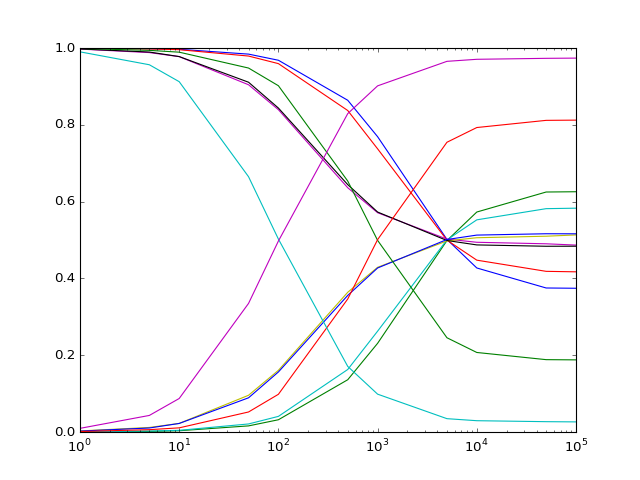

In [51]:
plt.figure()
#plt.xscale('log', marker=True)

In [50]:
plt.plot(rates30, ts2)
plt.plot(rates30, ts3)

In [25]:
plt.plot(rates30, ts2)
plt.plot(rates30, ts3)

plt.xscale('log', marker=True)

<IPython.core.display.Javascript object>


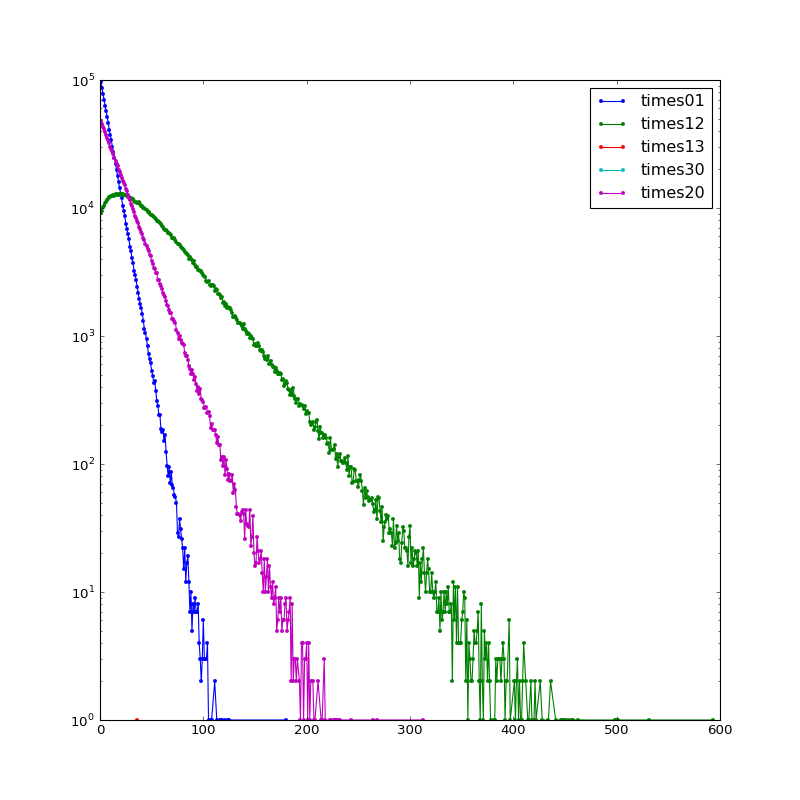

In [182]:
histo01 = Counter(times01)
bins01 = np.array(list(histo01.keys()))
freqs01 = np.array(list(histo01.values()))
freqs01.sum()

histo12 = Counter(times12)
bins12 = np.array(list(histo12.keys()))
freqs12 = np.array(list(histo12.values()))

histo13 = Counter(times13)
bins13 = np.array(list(histo13.keys()))
freqs13 = np.array(list(histo13.values()))

histo30 = Counter(times30)
bins30 = np.array(list(histo30.keys()))
freqs30 = np.array(list(histo30.values()))

histo20 = Counter(times20)
bins20= np.array(list(histo20.keys()))
freqs20 = np.array(list(histo20.values()))


plt.figure(figsize=(10, 10))

plt.plot(bins01, freqs01, ls='-',  marker='.', label='times01')
plt.plot(bins12, freqs12, ls='-',  marker='.', label='times12')
plt.plot(bins13, freqs13, ls='-',  marker='.', label='times13')
plt.plot(bins30, freqs30, ls='-',  marker='.', label='times30')
plt.plot(bins20, freqs20, ls='-',  marker='.', label='times20')

plt.legend()
plt.yscale('log')

<IPython.core.display.Javascript object>


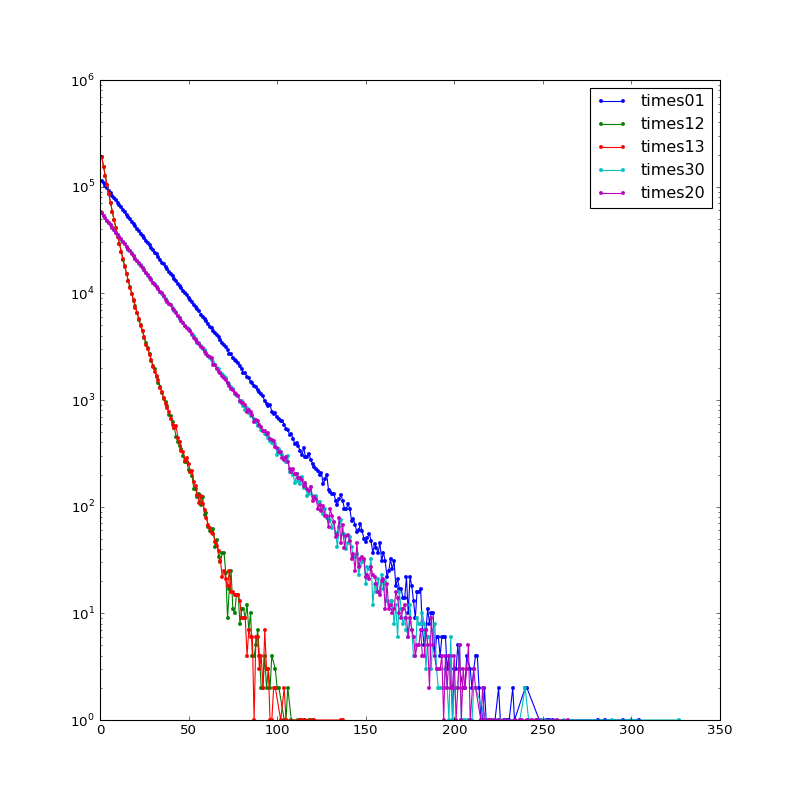

In [170]:
histo01 = Counter(times01)
bins01 = np.array(list(histo01.keys()))
freqs01 = np.array(list(histo01.values()))
freqs01.sum()

histo12 = Counter(times12)
bins12 = np.array(list(histo12.keys()))
freqs12 = np.array(list(histo12.values()))

histo13 = Counter(times13)
bins13 = np.array(list(histo13.keys()))
freqs13 = np.array(list(histo13.values()))

histo30 = Counter(times30)
bins30 = np.array(list(histo30.keys()))
freqs30 = np.array(list(histo30.values()))

histo20 = Counter(times20)
bins20= np.array(list(histo20.keys()))
freqs20 = np.array(list(histo20.values()))


plt.figure(figsize=(10, 10))

plt.plot(bins01, freqs01, ls='-',  marker='.', label='times01')
plt.plot(bins12, freqs12, ls='-',  marker='.', label='times12')
plt.plot(bins13, freqs13, ls='-',  marker='.', label='times13')
plt.plot(bins30, freqs30, ls='-',  marker='.', label='times30')
plt.plot(bins20, freqs20, ls='-',  marker='.', label='times20')

plt.legend()
plt.yscale('log')

<IPython.core.display.Javascript object>


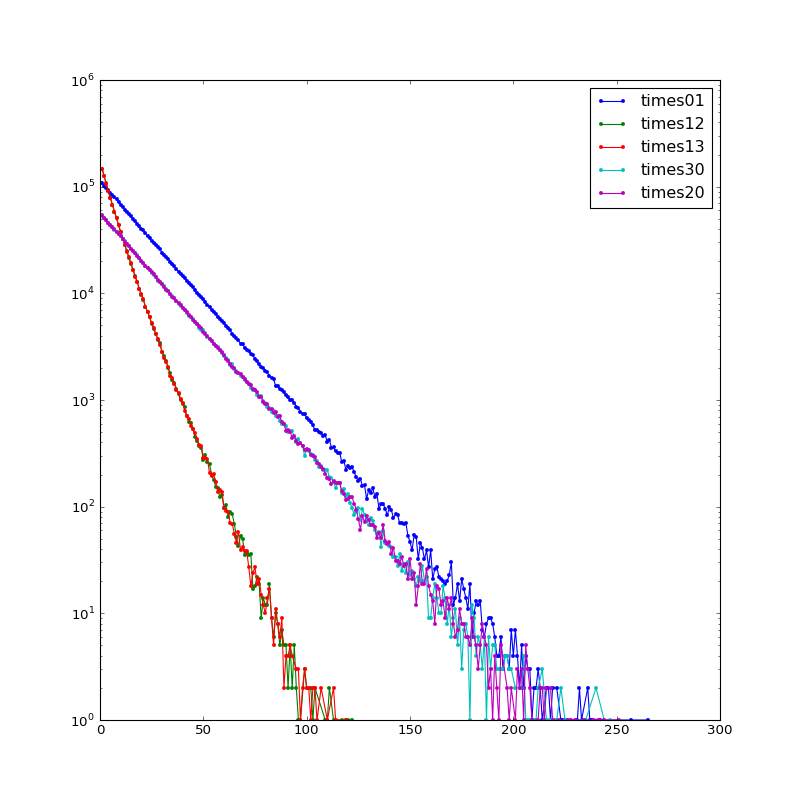

In [161]:
histo01 = Counter(times01)
bins01 = np.array(list(histo01.keys()))
freqs01 = np.array(list(histo01.values()))
freqs01.sum()

histo12 = Counter(times12)
bins12 = np.array(list(histo12.keys()))
freqs12 = np.array(list(histo12.values()))

histo13 = Counter(times13)
bins13 = np.array(list(histo13.keys()))
freqs13 = np.array(list(histo13.values()))

histo30 = Counter(times30)
bins30 = np.array(list(histo30.keys()))
freqs30 = np.array(list(histo30.values()))

histo20 = Counter(times20)
bins20= np.array(list(histo20.keys()))
freqs20 = np.array(list(histo20.values()))


plt.figure(figsize=(10, 10))

plt.plot(bins01, freqs01, ls='-',  marker='.', label='times01')
plt.plot(bins12, freqs12, ls='-',  marker='.', label='times12')
plt.plot(bins13, freqs13, ls='-',  marker='.', label='times13')
plt.plot(bins30, freqs30, ls='-',  marker='.', label='times30')
plt.plot(bins20, freqs20, ls='-',  marker='.', label='times20')

plt.legend()
plt.yscale('log')

<IPython.core.display.Javascript object>


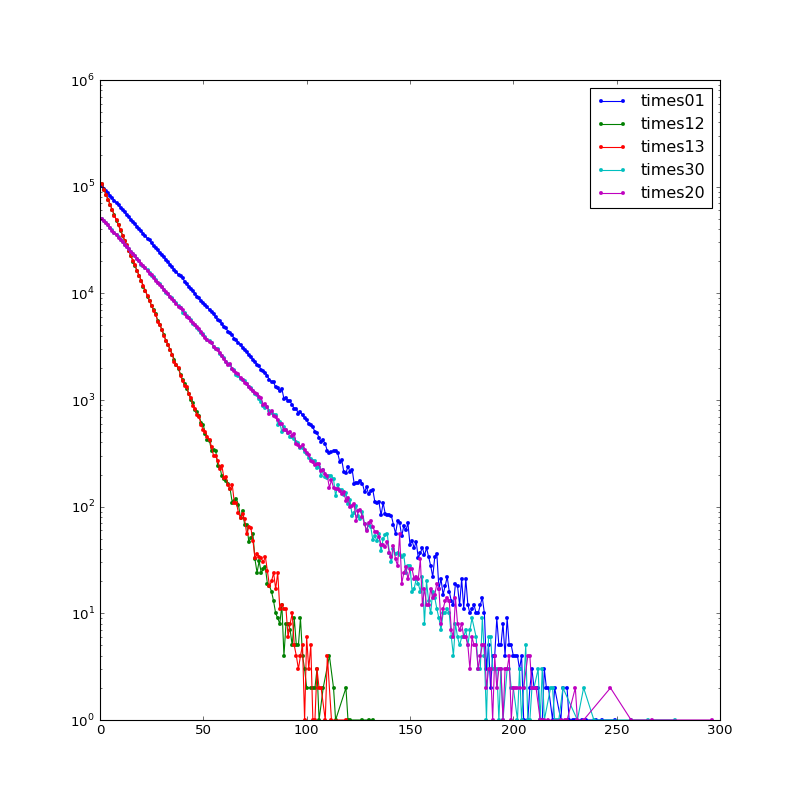

In [164]:
histo01 = Counter(times01)
bins01 = np.array(list(histo01.keys()))
freqs01 = np.array(list(histo01.values()))
freqs01.sum()

histo12 = Counter(times12)
bins12 = np.array(list(histo12.keys()))
freqs12 = np.array(list(histo12.values()))

histo13 = Counter(times13)
bins13 = np.array(list(histo13.keys()))
freqs13 = np.array(list(histo13.values()))

histo30 = Counter(times30)
bins30 = np.array(list(histo30.keys()))
freqs30 = np.array(list(histo30.values()))

histo20 = Counter(times20)
bins20= np.array(list(histo20.keys()))
freqs20 = np.array(list(histo20.values()))


plt.figure(figsize=(10, 10))

plt.plot(bins01, freqs01, ls='-',  marker='.', label='times01')
plt.plot(bins12, freqs12, ls='-',  marker='.', label='times12')
plt.plot(bins13, freqs13, ls='-',  marker='.', label='times13')
plt.plot(bins30, freqs30, ls='-',  marker='.', label='times30')
plt.plot(bins20, freqs20, ls='-',  marker='.', label='times20')

plt.legend()
plt.yscale('log')

<IPython.core.display.Javascript object>


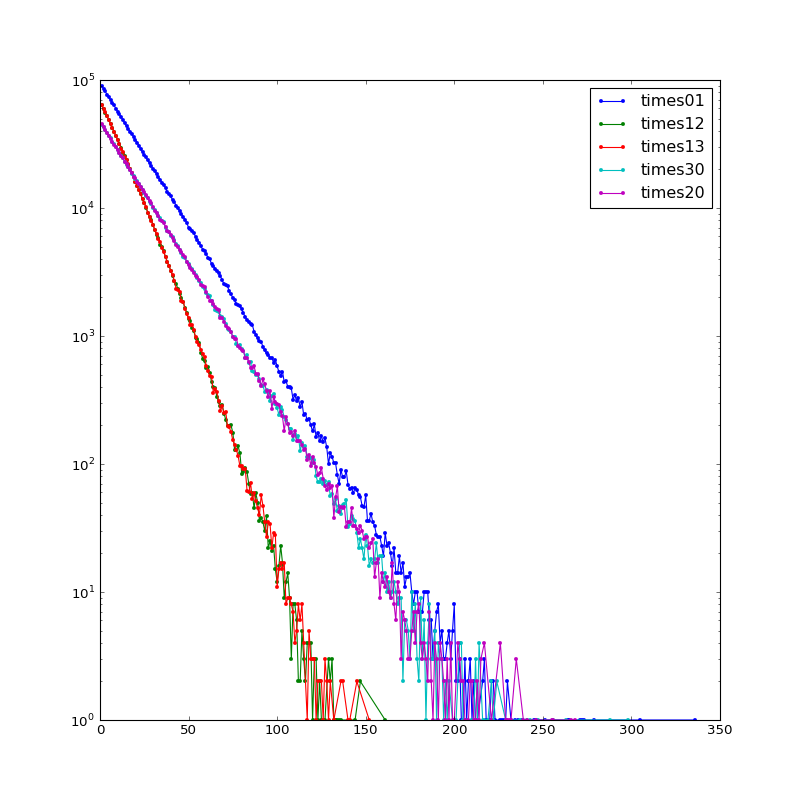

In [158]:
histo01 = Counter(times01)
bins01 = np.array(list(histo01.keys()))
freqs01 = np.array(list(histo01.values()))
freqs01.sum()

histo12 = Counter(times12)
bins12 = np.array(list(histo12.keys()))
freqs12 = np.array(list(histo12.values()))

histo13 = Counter(times13)
bins13 = np.array(list(histo13.keys()))
freqs13 = np.array(list(histo13.values()))

histo30 = Counter(times30)
bins30 = np.array(list(histo30.keys()))
freqs30 = np.array(list(histo30.values()))

histo20 = Counter(times20)
bins20= np.array(list(histo20.keys()))
freqs20 = np.array(list(histo20.values()))


plt.figure(figsize=(10, 10))

plt.plot(bins01, freqs01, ls='-',  marker='.', label='times01')
plt.plot(bins12, freqs12, ls='-',  marker='.', label='times12')
plt.plot(bins13, freqs13, ls='-',  marker='.', label='times13')
plt.plot(bins30, freqs30, ls='-',  marker='.', label='times30')
plt.plot(bins20, freqs20, ls='-',  marker='.', label='times20')

plt.legend()
plt.yscale('log')

<IPython.core.display.Javascript object>


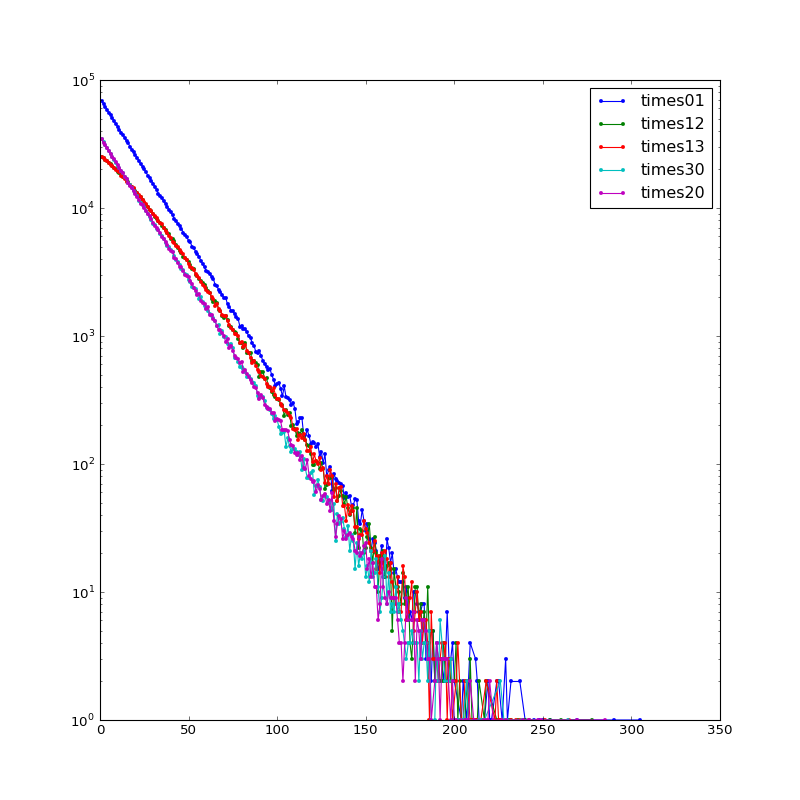

In [167]:
histo01 = Counter(times01)
bins01 = np.array(list(histo01.keys()))
freqs01 = np.array(list(histo01.values()))
freqs01.sum()

histo12 = Counter(times12)
bins12 = np.array(list(histo12.keys()))
freqs12 = np.array(list(histo12.values()))

histo13 = Counter(times13)
bins13 = np.array(list(histo13.keys()))
freqs13 = np.array(list(histo13.values()))

histo30 = Counter(times30)
bins30 = np.array(list(histo30.keys()))
freqs30 = np.array(list(histo30.values()))

histo20 = Counter(times20)
bins20= np.array(list(histo20.keys()))
freqs20 = np.array(list(histo20.values()))


plt.figure(figsize=(10, 10))

plt.plot(bins01, freqs01, ls='-',  marker='.', label='times01')
plt.plot(bins12, freqs12, ls='-',  marker='.', label='times12')
plt.plot(bins13, freqs13, ls='-',  marker='.', label='times13')
plt.plot(bins30, freqs30, ls='-',  marker='.', label='times30')
plt.plot(bins20, freqs20, ls='-',  marker='.', label='times20')

plt.legend()
plt.yscale('log')

<IPython.core.display.Javascript object>


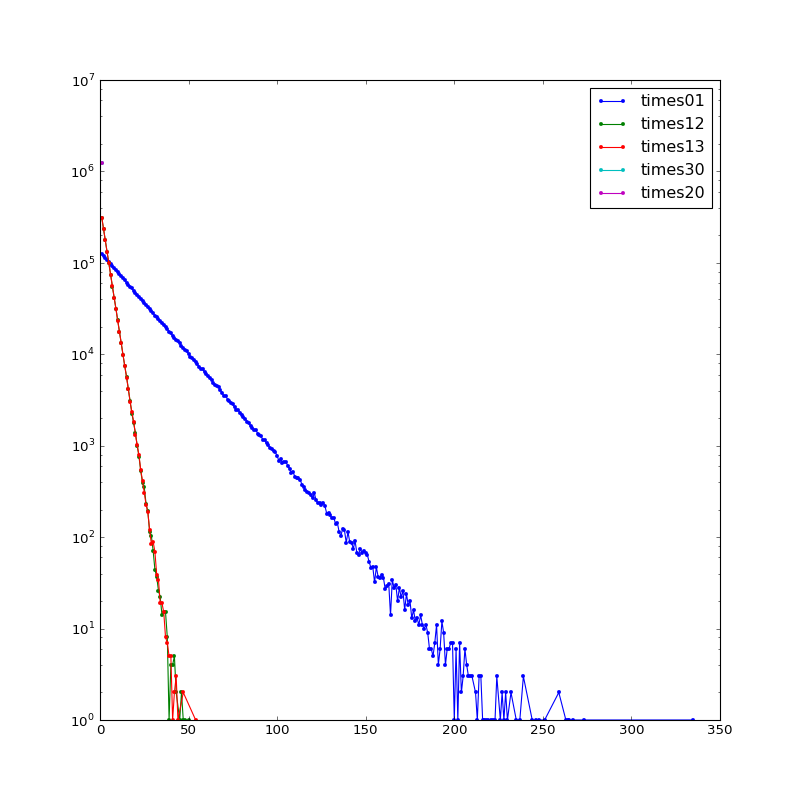

In [173]:
histo01 = Counter(times01)
bins01 = np.array(list(histo01.keys()))
freqs01 = np.array(list(histo01.values()))
freqs01.sum()

histo12 = Counter(times12)
bins12 = np.array(list(histo12.keys()))
freqs12 = np.array(list(histo12.values()))

histo13 = Counter(times13)
bins13 = np.array(list(histo13.keys()))
freqs13 = np.array(list(histo13.values()))

histo30 = Counter(times30)
bins30 = np.array(list(histo30.keys()))
freqs30 = np.array(list(histo30.values()))

histo20 = Counter(times20)
bins20= np.array(list(histo20.keys()))
freqs20 = np.array(list(histo20.values()))


plt.figure(figsize=(10, 10))

plt.plot(bins01, freqs01, ls='-',  marker='.', label='times01')
plt.plot(bins12, freqs12, ls='-',  marker='.', label='times12')
plt.plot(bins13, freqs13, ls='-',  marker='.', label='times13')
plt.plot(bins30, freqs30, ls='-',  marker='.', label='times30')
plt.plot(bins20, freqs20, ls='-',  marker='.', label='times20')

plt.legend()
plt.yscale('log')

In [37]:
ts1 = []
ts2 = []
ts3 = []

for rate30 in rates30:
    sampling_rate=100e3

    length01 = 0
    times01 = []

    length123 = 0
    times12 = []
    times13 = []

    length20 = 0
    times20 = []

    length30 = 0
    times30 = []


    p01 = rate01 / sampling_rate
    p12 = rate12 / sampling_rate / 2
    p13 = p12 + rate13 / sampling_rate / 2
    p20 = rate20 / sampling_rate
    p30 = rate30 / sampling_rate


    state1 = 0
    state2 = 0
    state3 = 0


    duration = 60 * sampling_rate

    t1 = 0
    t2 = 0
    t3 = 0

    for i in range(int(duration)):    


        nr = random.random() 

        if state2 == 0:
            length20 += 1
            if random.random() < p20:
                times20.append(length20)
                length20 = 0
                state2 = 1
                t2 += 1

        if state3 == 0:
            length30 += 1
            if random.random() < p30:
                times30.append(length30)
                length30 = 0
                state3 = 1
                t3 += 1

        # Dot empty
        if state1 == 1:
            length01 += 1
            if random.random() < p01:
                times01.append(length01)
                length01 = 0
                state1 = 0 
                t1 += 1

        # Dot full
        elif state1 == 0:
            length123 += 1
            # Tunneling out of 2
            nr = random.random() 
            if ((nr < p12) and (state2 == 1)):
                times12.append(length123)
                length123 = 0
                state1 = 1
                state2 = 0

            # Tunneling out of 3
            elif ((p12 < nr < p13) and (state3 == 1)):
                times13.append(length123)
                length123 = 0
                state1 = 1
                state3 = 0
                
    print(t2/ t1, t3 / t1)
    ts1.append(t1)
    ts2.append(t2 / t1)
    ts3.append(t3 / t1)

1.000009055510278 0.0
0.9995933783930314 0.00041565764267900387
0.9971222500746586 0.0028867994534085045
0.9945779654288911 0.0054310562592472305
0.9735764990850343 0.026432341162846207
0.9507529754675734 0.04925569936500226
0.8163843543160773 0.18361564568392277
0.7212713595515802 0.2787425838521441
0.5355523714640726 0.4644644196433569
0.5011454540622425 0.4988704919339836
0.47819052984685045 0.5218198076197467
0.4766902712376669 0.5233200439426682


<IPython.core.display.Javascript object>


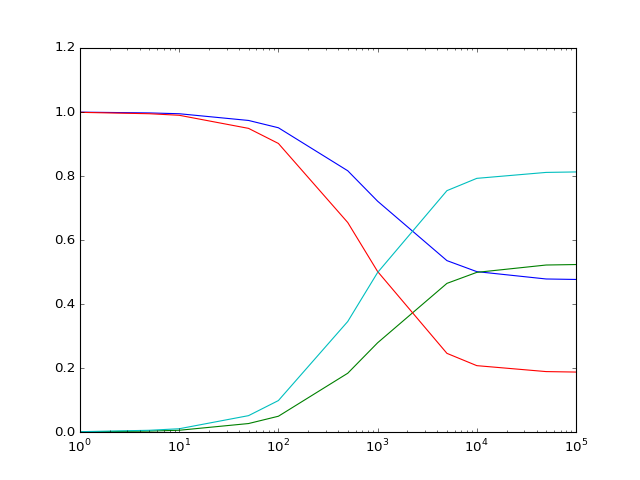

In [40]:
plt.figure()
plt.plot(rates30, ts2)
plt.plot(rates30, ts3)

plt.xscale('log', marker=True)